### **K-Means Clustering Algorithm**


K-Means is an iterative algorithm that partitions the dataset into `K` clusters by minimizing the **within-cluster sum of squares (WCSS)**. The basic steps involve:

1. Random initialization of cluster centroids.
2. Assignment of each point to the nearest centroid (cluster).
3. Recalculation of centroids.
4. Repeat until centroids don't change (convergence).


---


##### **Import Libraries and Generate Data**


In [143]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
np.random.seed(42)
sns.set_style("darkgrid")

In [144]:
from sklearn.datasets import make_blobs

X, y = make_blobs(n_samples=300, centers=3, random_state=42, cluster_std=1.0)

In [145]:
X.shape

(300, 2)

**Visualize the generated data**


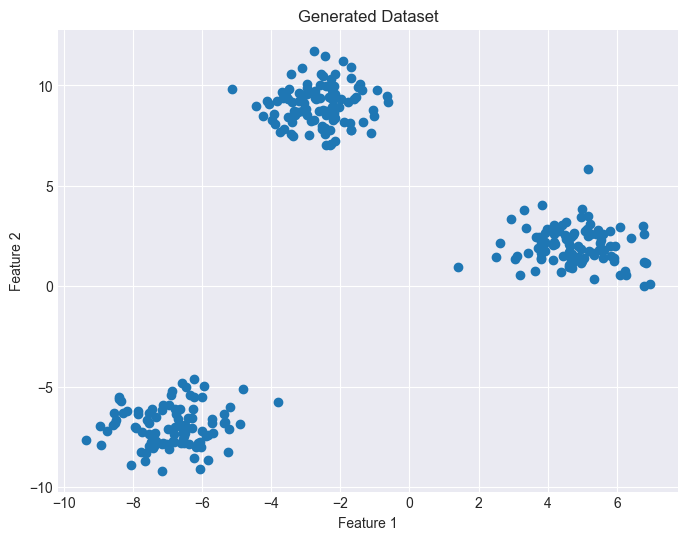

In [146]:
plt.figure(figsize=(8, 6))
plt.scatter(x=X[:, 0], y=X[:, 1])
plt.title("Generated Dataset")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

---


##### **Select the Number of Clusters (K)**


The number of clusters $K$ is a predefined value chosen by the user.</br>
In our case, we start with `K = 3`.


In [147]:
K = 3

---


##### **Randomly Initialize Centroids**


We initialize $K$ centroids by randomly selecting $K$ points from the dataset.

**Formula:**</br>
If we have $K$ clusters, we choose $K$ random points as the initial centroids:

$$
\mu_k = x_i \quad \text{where} \, x_i \in X
$$

Where $\mu_k$ represents the initial centroid for cluster $k$.


In [148]:
def initialize_centroids(X, K):
    np.random.seed(42)
    indices = np.random.choice(X.shape[0], K, replace=False)
    # print("indices",indices)
    centroids = X[indices]
    return centroids


centroids = initialize_centroids(X, K)
centroids

array([[ 4.05051408,  2.82277178],
       [-6.75933156, -6.36567076],
       [ 4.9208707 ,  1.35047016]])

**Visualize Initial Centroids**


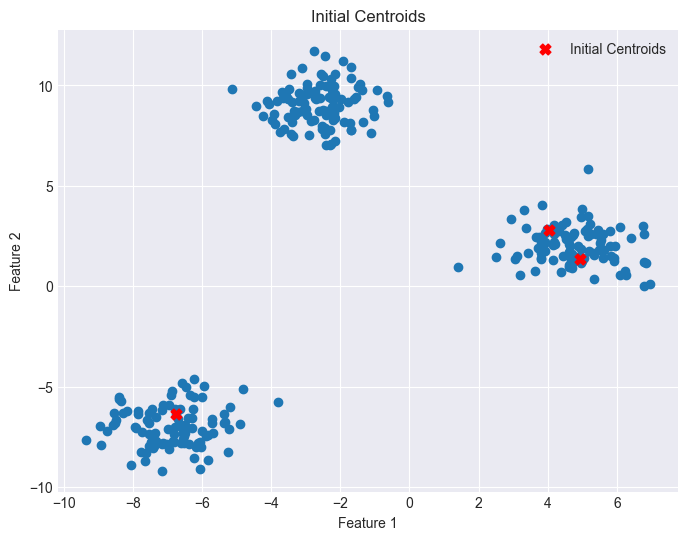

In [149]:
plt.figure(figsize=(8, 6))
plt.scatter(x=X[:, 0], y=X[:, 1])
plt.scatter(
    x=centroids[:, 0],
    y=centroids[:, 1],
    s=60,
    color="red",
    label="Initial Centroids",
    marker="X",
)
plt.title("Initial Centroids")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.show()

---


##### **Assign Each Data Point to the Nearest Centroid**


Each point is assigned to the cluster of the closest centroid using **Euclidean distance**.

**Formula (Euclidean Distance):**</br>
$$d(x_i, \mu_k) = \| x_i - \mu_k \| = \sqrt{\sum_{j=1}^{n}(x_{ij} - \mu_{kj})^2}$$
Where:

- $x_i$ is a data point.
- $\mu_k$ is a centroid.
- The distance is calculated for all points to all centroids.


In [150]:
def euclidean_distance(X, centroids):
    return np.sqrt(np.sum((X[:, np.newaxis] - centroids) ** 2, axis=2))


# euclidean_distance(X, centroids)

In [151]:
def euclidean_distance(X, centroids):
    return np.linalg.norm(X[:, np.newaxis] - centroids, axis=2)


# euclidean_distance(X, centroids)

In [152]:
def assign_clusters(X, centroids):
    distances = euclidean_distance(X, centroids)
    # print(distances)
    return np.argmin(distances, axis=1)


clusters = assign_clusters(X, centroids)
clusters

array([1, 1, 0, 0, 1, 2, 0, 2, 0, 0, 0, 2, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       2, 1, 0, 1, 1, 0, 2, 0, 0, 0, 1, 0, 1, 0, 1, 2, 1, 0, 2, 0, 1, 0,
       0, 0, 1, 0, 1, 2, 2, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 2, 2, 1, 1, 0,
       0, 1, 1, 0, 2, 1, 1, 0, 0, 1, 1, 0, 0, 2, 0, 0, 1, 0, 2, 1, 1, 0,
       2, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 2, 0, 2, 0, 0, 0, 0, 0, 2, 1,
       2, 0, 0, 0, 0, 2, 1, 0, 1, 2, 0, 2, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 2, 1, 0, 1, 0, 0, 1, 0, 0, 0, 2, 0, 2, 0, 0, 1, 2, 1,
       0, 0, 2, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0,
       2, 0, 2, 0, 1, 0, 1, 2, 0, 1, 2, 0, 0, 0, 1, 1, 2, 1, 0, 0, 2, 2,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 2, 0, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 2, 2, 1, 2, 1, 1, 1, 2,
       2, 0, 1, 0, 2, 2, 1, 2, 1, 0, 1, 2, 2, 1, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 1, 2, 2, 0, 0, 2, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 2, 2, 1, 2,
       1, 2, 0, 1, 0, 0, 2, 0, 1, 0, 2, 0, 1, 1])

In the code:

- `X[:, np.newaxis]` reshapes the data to allow pairwise subtraction with centroids.
- `distances` contains the Euclidean distances from each point to all centroids.
- `np.argmin` returns the index of the closest centroid for each point.


---


##### **Update Centroids**


The centroids are updated by computing the mean of the points assigned to each cluster.

**Formula (New Centroid Calculation):**<br>
$$\mu_k = \frac{1}{|C_k|} \sum_{x_i \in C_k} x_i$$
Where $C_k$ represents the set of points assigned to cluster $k$.


In [153]:
def update_centroids(X, clusters, K):
    new_centroids = np.array([X[clusters == i].mean(axis=0) for i in range(K)])
    return new_centroids


centroids = update_centroids(X, clusters, K)
centroids

array([[-0.54161752,  7.0438    ],
       [-6.88387179, -6.98398415],
       [ 5.271302  ,  1.52846193]])

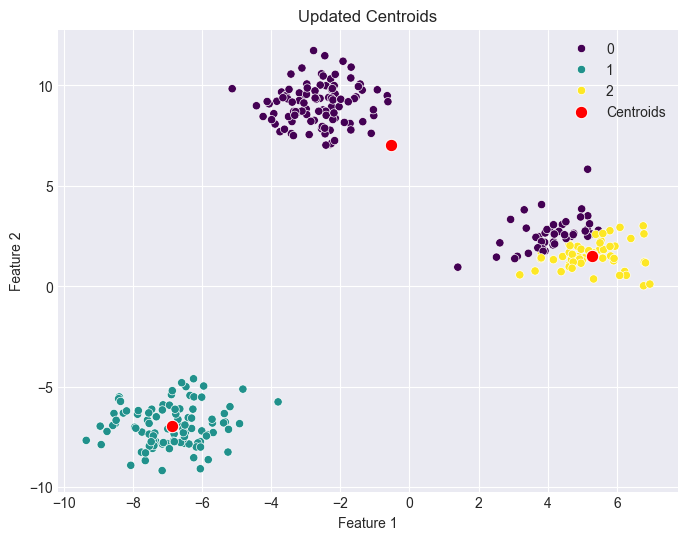

In [154]:
# Visualize updated centroids
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=clusters, palette="viridis")
sns.scatterplot(
    x=centroids[:, 0], y=centroids[:, 1], s=80, color="red", label="Centroids"
)
plt.title("Updated Centroids")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.show()

---


##### **Repeat Until Convergence**


The algorithm iterates, assigning clusters and updating centroids, until the centroids stop changing.


In [155]:
def kmeans(X, K, max_iters=100):
    # Random initialization of centroids
    centroids = initialize_centroids(X, K)

    for _ in range(max_iters):
        # Assign clusters
        clusters = assign_clusters(X, centroids)

        # Update centroids
        new_centroids = update_centroids(X, clusters, K)

        # Check for convergence (if centroids don't change)
        if np.all(centroids == new_centroids):
            break

        centroids = new_centroids

    return clusters, centroids


# Run the K-Means algorithm
clusters, centroids = kmeans(X, K)

---


##### **Visualizing the Final Clusters**


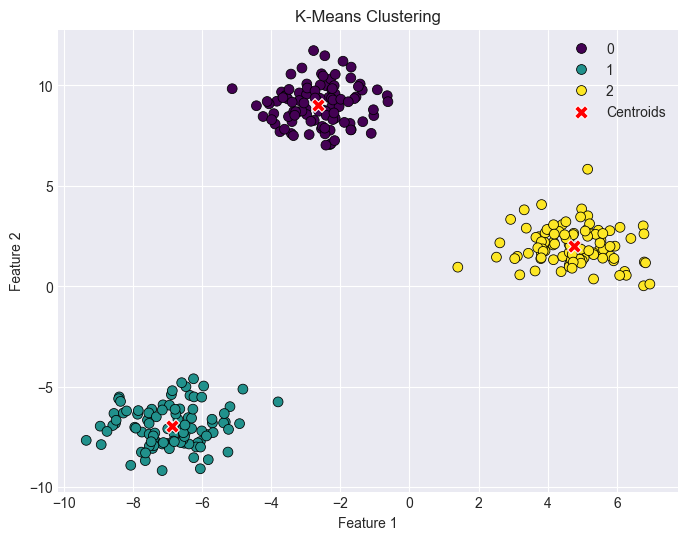

In [156]:
plt.figure(figsize=(8, 6))
sns.scatterplot(
    x=X[:, 0], y=X[:, 1], hue=clusters, palette="viridis", edgecolor="k", s=50
)
sns.scatterplot(
    x=centroids[:, 0],
    y=centroids[:, 1],
    color="red",
    marker="X",
    s=100,
    label="Centroids",
)
plt.title("K-Means Clustering")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.show()

---

##### **Compute WCSS (Within-Cluster Sum of Squares)**


We calculate **WCSS** to quantify how tight the clusters are.

**Formula (WCSS):**</br>
$$\text{WCSS} = \sum_{k=1}^{K} \sum_{x_i \in C_k} \| x_i - \mu_k \|^2$$
Where $C_k$ is the set of points in cluster $k$ and $\mu_k$ is the centroid of cluster $k$.


In [157]:
def compute_wcss(X, clusters, centroids):
    wcss = 0
    for k in range(centroids.shape[0]):
        cluster_points = X[clusters == k]
        wcss += np.sum((cluster_points - centroids[k]) ** 2)
    return wcss

##### **Applying the Elbow Method**


We apply the **Elbow Method** to determine the optimal number of clusters by plotting WCSS for different values of `K`.


In [158]:
wcss_list = []
K_values = range(1, 10)

for K in K_values:
    clusters, centroids = kmeans(X, K)
    wcss = compute_wcss(X, clusters, centroids)
    wcss_list.append(wcss)

**Plotting the Elbow Curve**


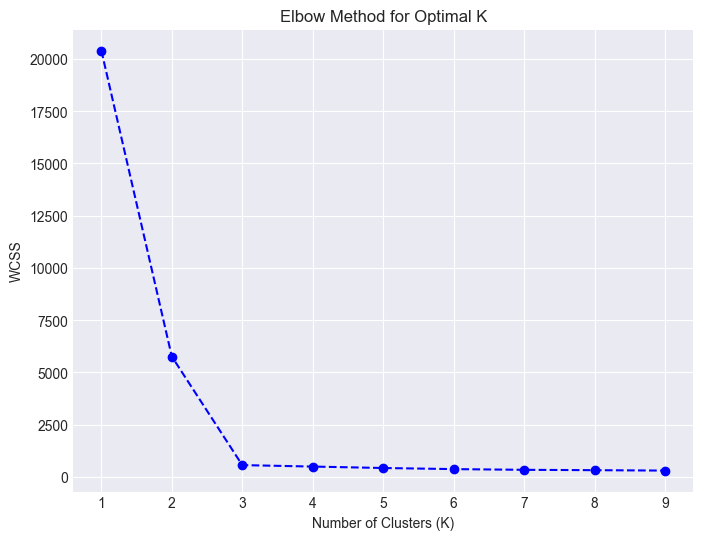

In [159]:
plt.figure(figsize=(8, 6))
plt.plot(K_values, wcss_list, "b--o")
plt.title("Elbow Method for Optimal K")
plt.xlabel("Number of Clusters (K)")
plt.ylabel("WCSS")
plt.show()

- The **Elbow Method** involves plotting the WCSS for each value of `K`.
- The "elbow" point indicates where the reduction in WCSS slows down significantly, suggesting an optimal `K`.
